**CS 334 Final Project: Shot Tracking** 🏀


In [3]:
import numpy as np
import pandas as pd
from random import randint, choice
import random
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')
import sklearn
from sklearn import model_selection
import seaborn as sns
import matplotlib

from matplotlib import pyplot as plt



Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [42]:
df = pd.read_csv("new.csv", index_col = 0)
df = df.dropna()
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[indices_to_keep].astype(np.float64)

X = df.drop("FGM", axis=1)
df2 = df.drop("FGM", axis = 1)
scaler = sklearn.preprocessing.StandardScaler() # Standard Scaler
scaler.fit(X)
X = scaler.transform(X)
y = df.FGM
#X= X[:,1:]
X.shape


(115944, 15)

In [6]:
X_names = df.to_records()
X_names

rec.array([(     0, 0., 1.,  24., 1., 10.8, 2., 1.9,  7.7, 0., 1.3, 1., 17.5, 0.389, 0.321, 101., 107.),
           (     1, 0., 1.,  24., 2.,  3.4, 0., 0.8, 28.2, 1., 6.1, 0., 17.5, 0.389, 0.321, 101., 107.),
           (     3, 0., 1.,  24., 4., 10.3, 2., 1.9, 17.2, 0., 3.4, 0., 17.5, 0.389, 0.321, 101., 107.),
           ...,
           (128065, 0., 0., -16., 6., 19.8, 4., 5.2,  0.6, 0., 0.6, 1., 18.9, 0.439, 0.267, 101., 109.),
           (128066, 0., 0., -16., 7., 23. , 2., 4.2, 16.9, 0., 4.2, 1., 18.9, 0.439, 0.267, 101., 109.),
           (128067, 0., 0., -16., 8.,  9.1, 4., 4.5, 18.3, 0., 3. , 0., 18.9, 0.439, 0.267, 101., 109.)],
          dtype=[('index', '<i8'), ('LOCATION', '<f8'), ('W', '<f8'), ('FINAL_MARGIN', '<f8'), ('SHOT_NUMBER', '<f8'), ('SHOT_CLOCK', '<f8'), ('DRIBBLES', '<f8'), ('TOUCH_TIME', '<f8'), ('SHOT_DIST', '<f8'), ('PTS_TYPE', '<f8'), ('CLOSE_DEF_DIST', '<f8'), ('FGM', '<f8'), ('FGA', '<f8'), ('FG percent', '<f8'), ('Three Point', '<f8'), ('ORAT', '<f8'), (

In [43]:
df.columns


Index(['LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK',
       'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST',
       'FGM', 'FGA', 'FG percent', 'Three Point', 'ORAT', 'DRAT'],
      dtype='object')

[Text(0.5, 1.0, 'Correlations Between Variables')]

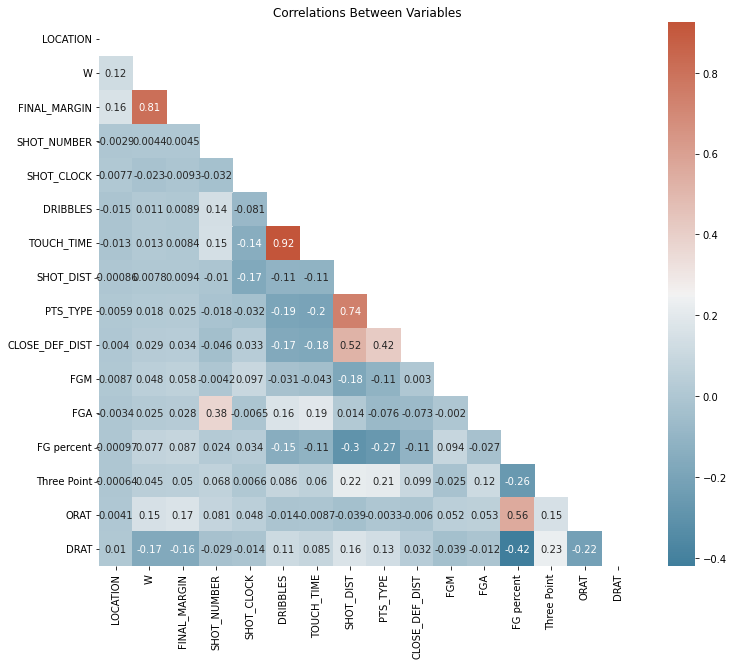

In [8]:
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap).set(title = "Correlations Between Variables")

We can drop W/L, Dribbles, and Pts

In [45]:
df2 = df2.drop(["W", "PTS_TYPE", "DRIBBLES"], axis = 1)

cols = list(df2.columns)
print(cols)
X = np.delete(X, [2,6,8], 1)
X.shape

KeyError: ignored

In [10]:

from sklearn.decomposition import PCA
pca = sklearn.decomposition.PCA(n_components=11)
pca = PCA(0.95)
pca.fit(X)
arr = pca.explained_variance_ratio_
arr2 = arr
sumR = 0
for i in range(len(arr)):
    arr2[i] = arr2[i] + sumR
    sumR = arr2[i]

pve = arr2[-1]

print("Percent Variance Explained by each Principle Component:")
print(arr2)

Percent Variance Explained by each Principle Component:
[0.17689616 0.31035333 0.43710285 0.52891406 0.61840267 0.70260397
 0.77520767 0.83838777 0.89117355 0.94160034 0.97671936]


In [11]:
pca.noise_variance_

0.2793700852407257

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=0)

np.all(np.isfinite(X_train))

True

Guessing Randomly we can get about 50% accuracy

In [13]:
n = len(y)
guess = np.zeros(n)
for i in range(n):
    guess[i] = random.randint(0, 1) # decide on a k each time the loop runs

guess_score = (sum(guess == y)/len(y))

Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification


rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=8,min_samples_leaf=4, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, n_estimators=500,
                       random_state=0)

In [30]:
rf_pred = rf_clf.predict(X_test)
rf_accuracy = rf_clf.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

importances = rf_clf.feature_importances_




Random Forest Accuracy: 0.6127242410303588


Text(0, 0.5, 'Feature Importance')

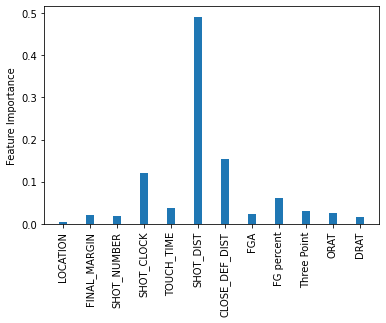

In [54]:
#fn = rf_clf.feature_names_in_
ax= plt.bar(list(df2.columns), importances, width = 0.3)
plt.xticks(rotation='vertical')
plt.ylabel("Feature Importance")


K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [17]:
knn_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test,y_test)


Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
GNB = nb_clf.score(X_test, y_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_accuracy = lr_clf.score(X_test, y_test)
params = lr_clf.get_params()
print("Feature Weights: ", lr_clf.coef_)


Feature Weights:  [[ 0.00352111  0.09015743 -0.00063598  0.10466712 -0.0684633  -0.51616285
   0.28146319  0.0319322   0.05900065  0.02722094  0.03819599  0.04128139]]


Index(['LOCATION', 'FINAL_MARGIN', 'SHOT_NUMBER', 'SHOT_CLOCK', 'TOUCH_TIME',
       'SHOT_DIST', 'CLOSE_DEF_DIST', 'FGA', 'FG percent', 'Three Point',
       'ORAT', 'DRAT'],
      dtype='object')
<class 'list'> 1
[ 0.00352111  0.09015743 -0.00063598  0.10466712 -0.0684633  -0.51616285
  0.28146319  0.0319322   0.05900065  0.02722094  0.03819599  0.04128139]


Text(0, 0.5, 'Feature Weights')

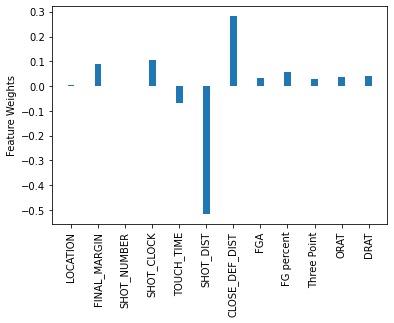

In [69]:
print(df2.columns)
coef = list(lr_clf.coef_)
print(type(coef), len(coef))
coef = coef[0]
print(coef)
ax = plt.bar(list(df2.columns), coef, width = 0.25)
plt.xticks(rotation='vertical')
plt.ylabel("Feature Weights")

[0.5804680312787488, 0.6127242410303588, 0.6057957681692733, 0.5007848616573518, 0.5878277368905244]


Text(0.5, 1.0, 'Model Performance')

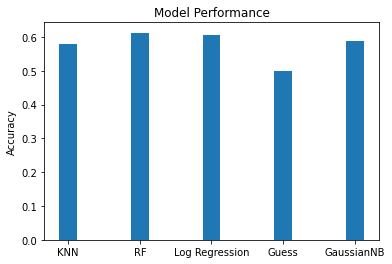

In [26]:
xlabels = ["KNN", "RF", "Log Regression", "Guess", "GaussianNB"]
accuracies = [knn_accuracy, rf_accuracy, lr_accuracy, guess_score, GNB]
print(accuracies)
ax = plt.bar(xlabels, accuracies, width = 0.25)
plt.ylabel("Accuracy")
plt.title("Model Performance")


Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix
rf_mat = confusion_matrix(y_test, rf_pred)
print("RF matrix", rf_mat)


lr_mat = confusion_matrix(y_test, lr_pred)
print("LR matrix", lr_mat)
print(sum(lr_mat))

print(sum(lr_mat[0,:]))
print(sum(lr_mat[1,:]))



knn_mat = confusion_matrix(y_test, knn_pred)
print("knn matrix", knn_mat)


nb_mat = confusion_matrix(y_test, nb_pred)
print("nb matrix", nb_mat)



In [ ]:

from sklearn.tree import export_graphviz
# Export as dot file
estimator = rf_clf.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)